# Table of Contents
* [Comparing TAD borders between experiments](#Comparing-TAD-borders-between-experiments)
	* [Alignment of TAD borders](#Alignment-of-TAD-borders)
	* [Significance](#Significance)
	* [Playing with borders](#Playing-with-borders)
		* [Get a given column](#Get-a-given-column)
		* [Search for aligned TADs with specific features](#Search-for-aligned-TADs-with-specific-features)
			* [Strongly conserved broders](#Strongly-conserved-broders)
			* [Borders specific to one experiment](#Borders-specific-to-one-experiment)


# Comparing TAD borders between experiments

In [1]:
from pytadbit import load_chromosome

We load Chromosome objects, previously saved. These object usualy only contain "metadata", chromosome size, position of TADs for each experiment.

_Note: the interaction matrices associated o the experiment can , also be saved, but by default, they are not as they can be loaded afterwards directly from the matrix._

In [2]:
crm = load_chromosome('results/fragment/chr18.tdb')

In [3]:
print crm

Chromosome chr19:
   2  experiments loaded: mouse_B, mouse_PSC
   0  alignment loaded: 
   species         : UNKNOWN
   assembly version: UNKNOWN



## Alignment of TAD borders

In [6]:
ali = crm.align_experiments(['mouse_B', 'mouse_PSC'])

/home/participant/miniconda2/lib/python2.7/site-packages/pytadbit/utils/extraviews.py:958: UserWarning: WARNING: raw Hi-C data not available, TAD's height fixed to 1
  "TAD's height fixed to 1")


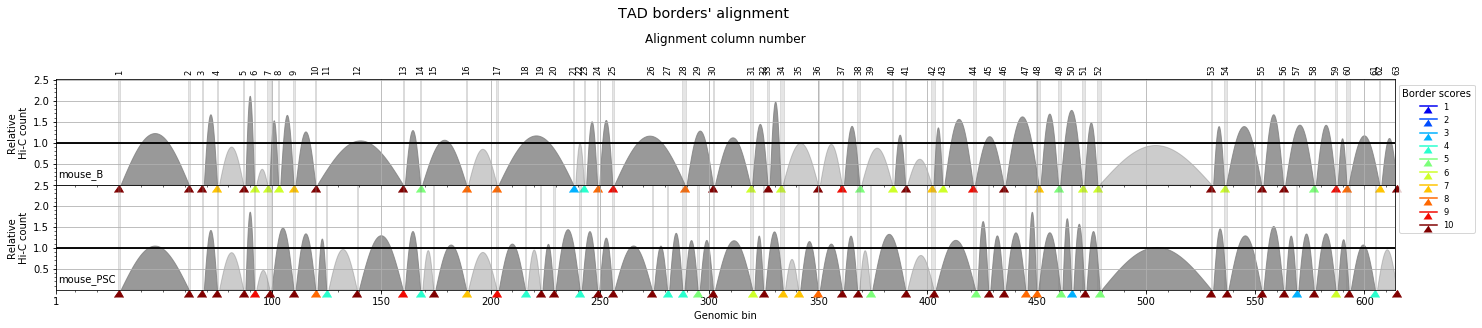

In [7]:
ali.draw()

## Significance

In [9]:
ali, stats = crm.align_experiments(['mouse_B', 'mouse_PSC'], randomize=True)

In [10]:
print ali

Alignment shown in 100 Kb (2 experiments) (scores: 0 1 2 3 4 5 6 7 8 9 10)
  mouse_B:|    30|    62|    68|    75|    87|    92|    98|   103|   110|   120| ---- | ---- |   160|   168| ---- |   189|   203| ---- | ---- | ---- |   238| ---- |   243|   249|   256| ---- | ---- |   289| ---- |   302|   319| ---- |   327|   333| ---- |   350|   361|   369| ---- |   384|   390|   402|   407|   421| ---- |   435| ---- |   451|   460| ---- |   471|   478|   530|   536|   553|   563| ---- |   577|   587|   592| ---- |   607|   615
mouse_PSC:|    30|    62|    68|    75|    87|    92|    99| ---- |   110|   120|   125|   139|   160|   168|   174|   189|   203|   216|   223|   229| ---- |   241| ---- |   249|   256|   274|   281|   288|   295|   302|   320|   325| ---- |   334|   341|   350|   361|   368|   374| ---- |   390|   403| ---- |   422|   428|   435|   445|   450|   461|   466|   472|   479|   530|   537|   553|   563|   569|   577|   587|   593|   605| ---- |   615



In [11]:
stats

(0.5, 0.0, 0.8888888888888888, 0.9107142857142857)

In [12]:
print 'Alignment score: %.3f, p-value: %.4f\n  proportion of borders of T0 found in T60: %.3f, of T60 in T0 %.3f' % stats

Alignment score: 0.500, p-value: 0.0000
  proportion of borders of T0 found in T60: 0.889, of T60 in T0 0.911


## Playing with borders

### Get a given column

In [13]:
ali.get_column(3)

[(2, [>6700<, >6700<])]

In [14]:
cols = ali.get_column(3)

In [15]:
col = cols[0]

In [16]:
border1, border2 = col[1]

In [17]:
border1['score']

10.0

In [18]:
border2['score']

10.0

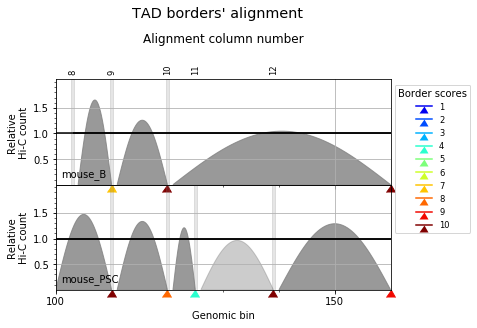

In [25]:
ali.draw(focus=(100, 160))

### Search for aligned TADs with specific features

#### Strongly conserved broders

In [20]:
ali.get_column(lambda x: x['score']>5, min_num=2)

[(0, [>2900<, >2900<]),
 (1, [>6100<, >6100<]),
 (2, [>6700<, >6700<]),
 (3, [>7400<, >7400<]),
 (4, [>8600<, >8600<]),
 (5, [>9100<, >9100<]),
 (6, [>9700<, >9800<]),
 (8, [>10900<, >10900<]),
 (9, [>11900<, >11900<]),
 (12, [>15900<, >15900<]),
 (15, [>18800<, >18800<]),
 (16, [>20200<, >20200<]),
 (23, [>24800<, >24800<]),
 (24, [>25500<, >25500<]),
 (29, [>30100<, >30100<]),
 (30, [>31800<, >31900<]),
 (33, [>33200<, >33300<]),
 (35, [>34900<, >34900<]),
 (36, [>36000<, >36000<]),
 (40, [>38900<, >38900<]),
 (41, [>40100<, >40200<]),
 (45, [>43400<, >43400<]),
 (47, [>45000<, >44900<]),
 (50, [>47000<, >47100<]),
 (52, [>52900<, >52900<]),
 (53, [>53500<, >53600<]),
 (54, [>55200<, >55200<]),
 (55, [>56200<, >56200<]),
 (58, [>58600<, >58600<]),
 (59, [>59100<, >59200<]),
 (62, [>61400<, >61400<])]

#### Borders specific to one experiment 

In [22]:
ali.get_column(lambda x: x['score']==0.0, lambda x: x['exp'].name=='mouse_B', min_num=1)

[(10, [>-<, >12400<]),
 (11, [>-<, >13800<]),
 (14, [>-<, >17300<]),
 (17, [>-<, >21500<]),
 (18, [>-<, >22200<]),
 (19, [>-<, >22800<]),
 (21, [>-<, >24000<]),
 (25, [>-<, >27300<]),
 (26, [>-<, >28000<]),
 (28, [>-<, >29400<]),
 (31, [>-<, >32400<]),
 (34, [>-<, >34000<]),
 (38, [>-<, >37300<]),
 (44, [>-<, >42700<]),
 (46, [>-<, >44400<]),
 (49, [>-<, >46500<]),
 (56, [>-<, >56800<]),
 (60, [>-<, >60400<])]